Universal Imports

In [1]:
import pandas as pd
import numpy as np 
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from datetime import date, timedelta
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot

In [2]:
countries = ['India', 'USA', 'United Kingdom', 'Russia', 'Iran']

Matplotlib Code to make our graphs better

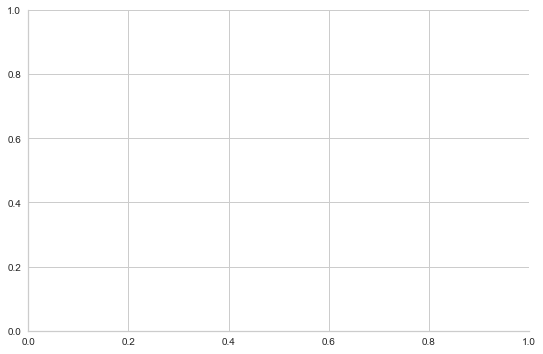

In [70]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [74]:
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

# PART 1: COMPARING DIFFERENT MODELS


Extracting data from Our World in Data and placing it in a dataframe.

In [3]:
csv_data = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(csv_data, usecols= ["location", "date", "new_cases", "new_tests", "new_deaths"])
df['date'] = pd.to_datetime(df.date)
df.dropna(inplace=True)
df.head()
df.isna()

,location,date,new_cases,new_deaths,new_tests
900,False,False,False,False,False
901,False,False,False,False,False
902,False,False,False,False,False
903,False,False,False,False,False
904,False,False,False,False,False
...,...,...,...,...,...
86189,False,False,False,False,False
86190,False,False,False,False,False
86191,False,False,False,False,False
86192,False,False,False,False,False


Using different countries data

In [4]:
data_ind = df[df["location"] == "India"] #India
data_ind_features = data_ind.drop(['location', 'date', 'new_cases'], axis = 1)
data_ind_target = data_ind['new_cases'].copy()

data_usa = df[df['location'] == 'United States'] #United States
data_usa_features = data_usa.drop(['location', 'date', 'new_cases'], axis = 1)
data_usa_target = data_usa['new_cases'].copy()

data_uk = df[df['location'] == 'United Kingdom'] #United Kingdom
data_uk_features = data_uk.drop(['location', 'date', 'new_cases'], axis = 1)
data_uk_target = data_uk['new_cases'].copy()

data_russia = df[df['location'] == 'Russia'] #Russia
data_russia_features = data_russia.drop(['location', 'date', 'new_cases'], axis = 1)
data_russia_target = data_russia['new_cases'].copy()

data_iran = df[df['location'] == 'Iran'] #Iran
data_iran_features = data_iran.drop(['location', 'date', 'new_cases'], axis = 1)
data_iran_target = data_iran['new_cases'].copy()



Feature Scaling

In [5]:
scaler = StandardScaler()
data_ind_features_sc = scaler.fit_transform(data_ind_features)
data_usa_features_sc = scaler.fit_transform(data_usa_features)
data_uk_features_sc = scaler.fit_transform(data_uk_features)
data_russia_features_sc = scaler.fit_transform(data_russia_features)
data_iran_features_sc = scaler.fit_transform(data_iran_features)

Dividing into training set and test set

In [6]:
train_india_x, test_india_x, train_india_y, test_india_y  = train_test_split(data_ind_features_sc, data_ind_target, test_size = 0.2)
train_usa_x, test_usa_x , train_usa_y, test_usa_y = train_test_split(data_usa_features_sc, data_usa_target, test_size = 0.2)
train_uk_x, test_uk_x, train_uk_y, test_uk_y = train_test_split(data_uk_features_sc, data_uk_target, test_size = 0.2)
train_russia_x, test_russia_x, train_russia_y, test_russia_y = train_test_split(data_russia_features_sc, data_russia_target, test_size = 0.2)
train_iran_x, test_iran_x, train_iran_y, test_iran_y = train_test_split(data_iran_features_sc, data_iran_target, test_size = 0.2)

Creating Linear Regression Models for each country:   

In [7]:
india_lreg = LinearRegression()
usa_lreg = LinearRegression()
russia_lreg = LinearRegression()
uk_lreg = LinearRegression()
iran_lreg = LinearRegression()

Fitting Models

In [8]:
india_lreg.fit(train_india_x, train_india_y)
usa_lreg.fit(train_usa_x, train_usa_y)
russia_lreg.fit(train_russia_x, train_russia_y)
uk_lreg.fit(train_uk_x, train_uk_y)
iran_lreg.fit(train_iran_x, train_iran_y)

LinearRegression()

Calculating RMSE

In [9]:
def calcRMSE(model,x,y):
    predictions = model.predict(x)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse

Visualizing

In [10]:
rmse_for_lreg =list()

india_lreg_rmse = calcRMSE(india_lreg, test_india_x, test_india_y)
usa_lreg_rmse = calcRMSE(usa_lreg, test_usa_x, test_usa_y)
russia_lreg_rmse = calcRMSE(russia_lreg, test_russia_x, test_russia_y)
uk_lreg_rmse = calcRMSE(uk_lreg, test_uk_x, test_uk_y)
iran_lreg_rmse = calcRMSE(iran_lreg, test_iran_x, test_iran_y)

rmse_for_lreg.extend([india_lreg_rmse, usa_lreg_rmse, uk_lreg_rmse, russia_lreg_rmse, iran_lreg_rmse])

print(rmse_for_lreg)

[25768.731164953806, 31620.087400739307, 11955.890941689211, 3756.659956714264, 1518.848477367582]


Creating Random Forest Regressor Models

In [11]:
india_rfr = RandomForestRegressor()
usa_rfr = RandomForestRegressor()
uk_rfr = RandomForestRegressor()
russia_rfr = RandomForestRegressor()
iran_rfr = RandomForestRegressor()

Fitting the models

In [12]:
india_rfr.fit(train_india_x, train_india_y)
usa_rfr.fit(train_usa_x, train_usa_y)
uk_rfr.fit(train_uk_x, train_uk_y)
russia_rfr.fit(train_russia_x, train_russia_y)
iran_rfr.fit(train_iran_x, train_iran_y)

RandomForestRegressor()

Calculating RMSE

In [13]:
rmse_for_rfr = list()

india_rfr_rmse = calcRMSE(india_rfr, test_india_x, test_india_y)
usa_rfr_rmse = calcRMSE(usa_rfr, test_usa_x, test_usa_y)
uk_rfr_rmse = calcRMSE(uk_rfr, test_uk_x, test_uk_y)
russia_rfr_rmse = calcRMSE(russia_rfr, test_russia_x, test_russia_y)
iran_rfr_rmse = calcRMSE(iran_rfr, test_iran_x, test_iran_y)

rmse_for_rfr.extend([india_rfr_rmse, usa_rfr_rmse, uk_rfr_rmse, russia_rfr_rmse, iran_rfr_rmse])
print(rmse_for_rfr)

[11946.76263256354, 30041.849313659044, 8678.746112734038, 3125.0545196307958, 524.4553562882867]


Visualizing the 2 algorithms and comparing them.

Training our model over test set.

In [25]:
pred_india_lreg = india_lreg.predict(data_ind_features_sc)
pred_usa_lreg = usa_lreg.predict(data_usa_features_sc)
pred_uk_lreg = uk_lreg.predict(data_uk_features_sc)
pred_russia_lreg = russia_lreg.predict(data_russia_features_sc)
pred_iran_lreg = iran_lreg.predict(data_iran_features_sc)

In [26]:
pred_india_rfr = india_rfr.predict(data_ind_features_sc)
pred_usa_rfr = usa_rfr.predict(data_usa_features_sc)
pred_uk_rfr = uk_rfr.predict(data_uk_features_sc)
pred_russia_rfr = russia_rfr.predict(data_russia_features_sc)
pred_iran_rfr = iran_rfr.predict(data_iran_features_sc)

Plotting the curves of cases in the selected countries. 

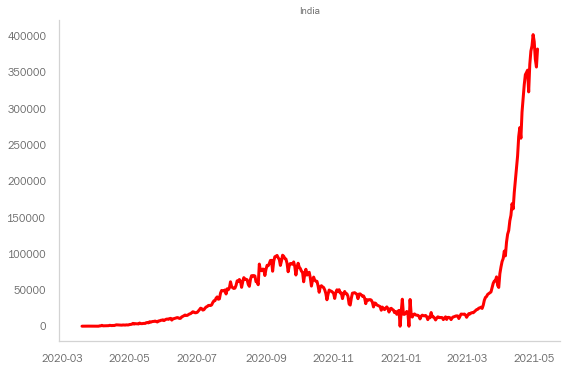

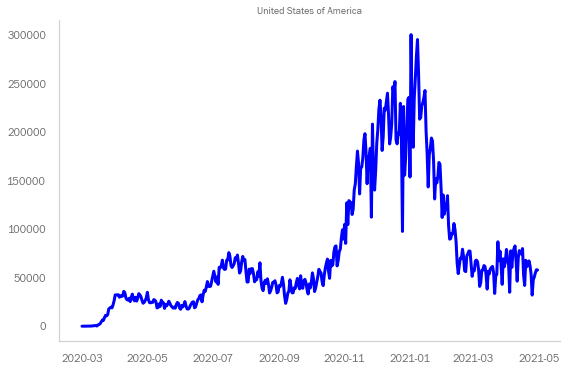

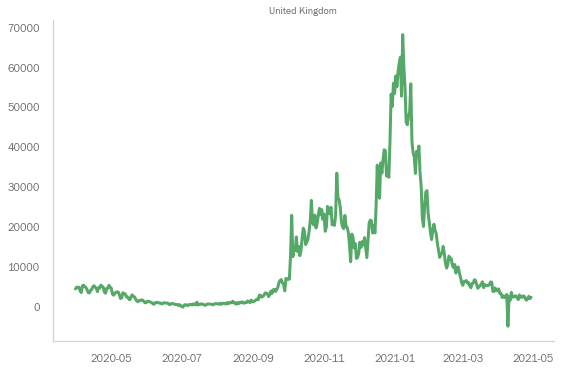

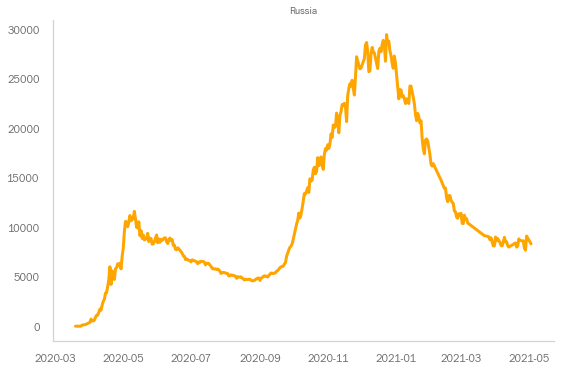

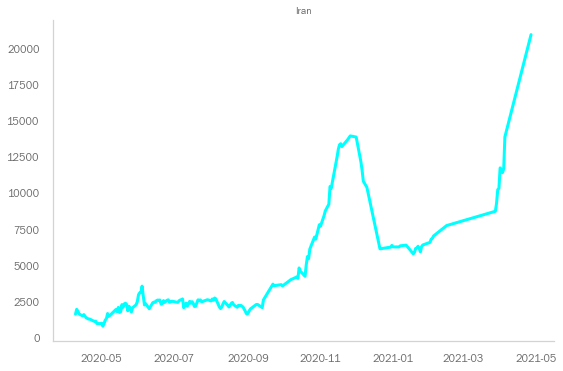

In [75]:


plt.plot(data_ind['date'],data_ind['new_cases'],color = 'red', linewidth = 3)
plt.title('India', size = 10)
plt.show()

plt.plot(data_usa['date'], data_usa['new_cases'], color = 'blue', linewidth = 3)
plt.title('United States of America', size = 10)
plt.show()

plt.plot(data_uk['date'], data_uk['new_cases'], color = 'g' , linewidth = 3)
plt.title('United Kingdom', size = 10)
plt.show()

plt.plot(data_russia['date'], data_russia['new_cases'], color ='orange', linewidth = 3)
plt.title('Russia', size = 10)
plt.show()

plt.plot(data_iran['date'], data_iran['new_cases'], color = 'cyan', linewidth = 3)
plt.title('Iran', size = 10)
plt.show()

Plotting a curve of our test predictions over actual predictions

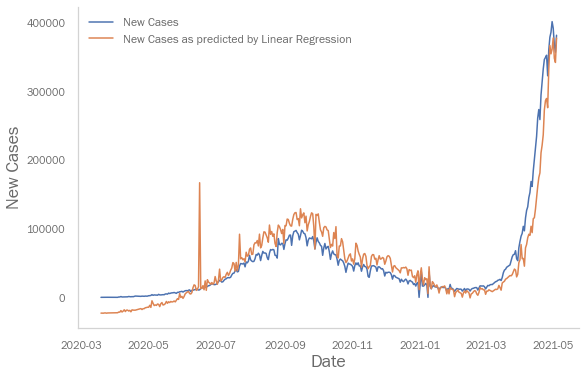

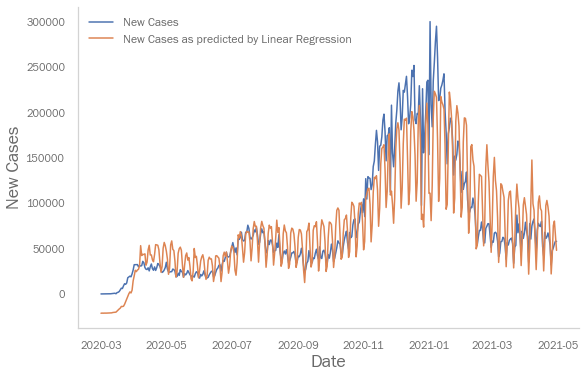

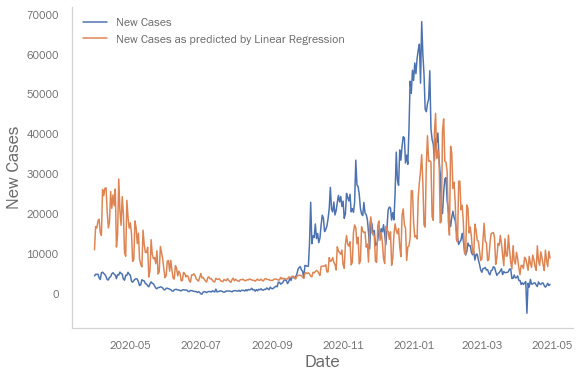

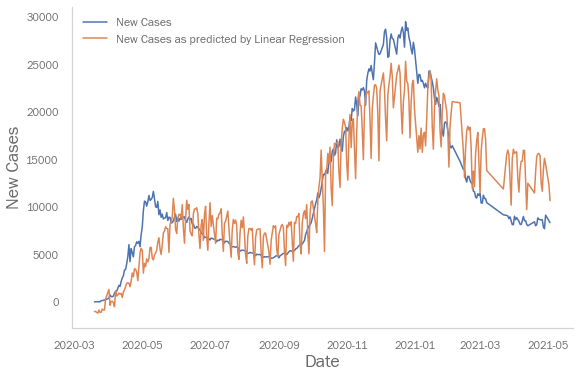

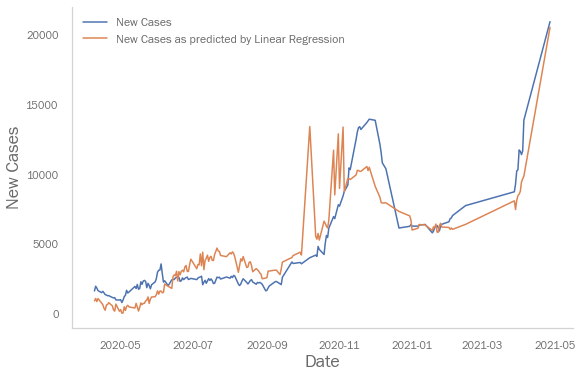

In [76]:
plt.plot(data_ind['date'],data_ind['new_cases'])
plt.plot(data_ind['date'],pred_india_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.plot(data_usa['date'],data_usa['new_cases'])
plt.plot(data_usa['date'],pred_usa_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.plot(data_uk['date'],data_uk['new_cases'])
plt.plot(data_uk['date'],pred_uk_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.plot(data_russia['date'],data_russia['new_cases'])
plt.plot(data_russia['date'],pred_russia_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.plot(data_iran['date'],data_iran['new_cases'])
plt.plot(data_iran['date'],pred_iran_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

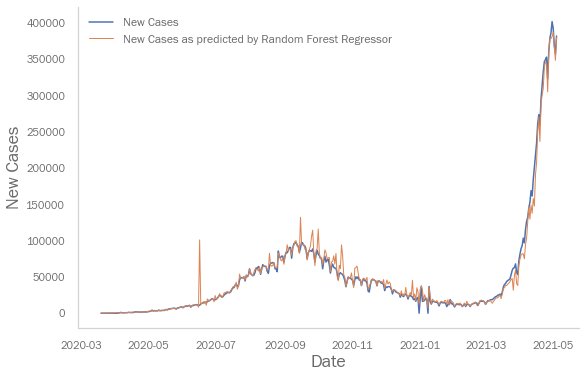

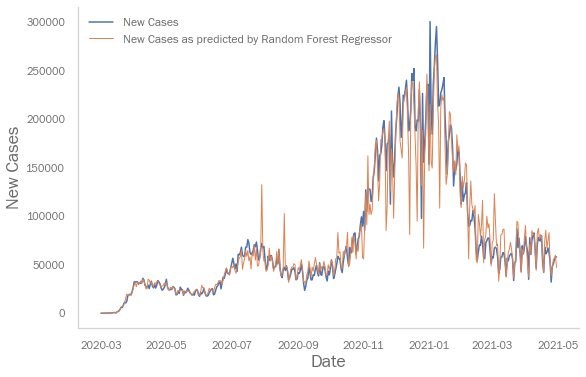

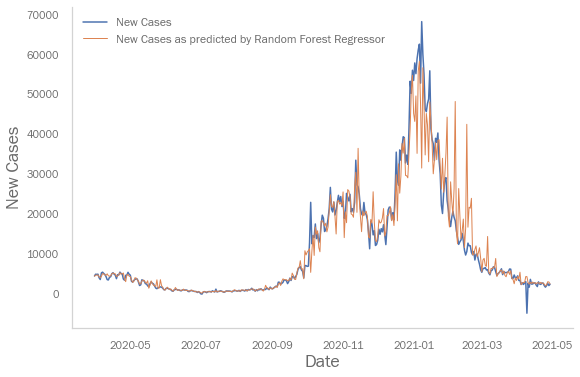

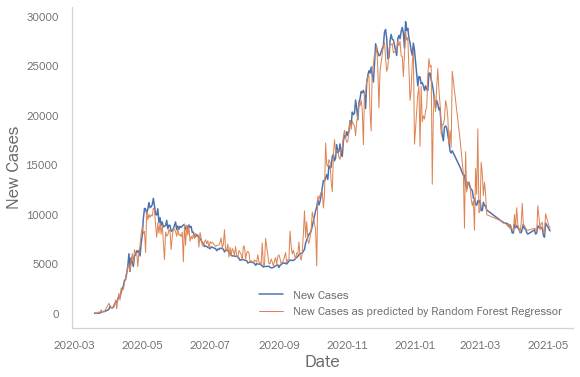

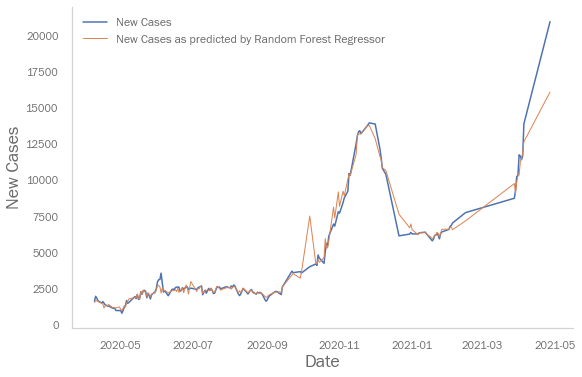

In [77]:
plt.plot(data_ind['date'],data_ind['new_cases'])
plt.plot(data_ind['date'],pred_india_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.plot(data_usa['date'],data_usa['new_cases'])
plt.plot(data_usa['date'],pred_usa_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.plot(data_uk['date'],data_uk['new_cases'])
plt.plot(data_uk['date'],pred_uk_rfr,linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.plot(data_russia['date'],data_russia['new_cases'])
plt.plot(data_russia['date'],pred_russia_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.plot(data_iran['date'],data_iran['new_cases'])
plt.plot(data_iran['date'],pred_iran_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

Prediction Error Graph

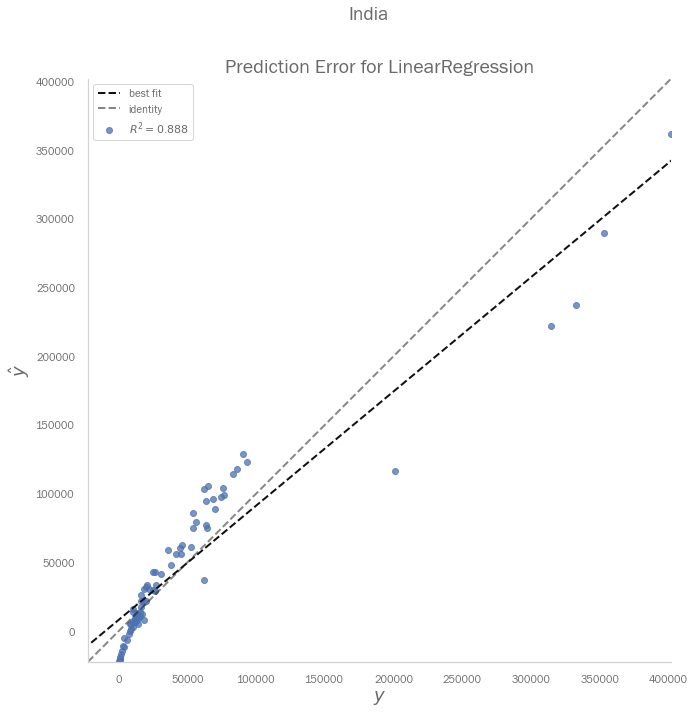

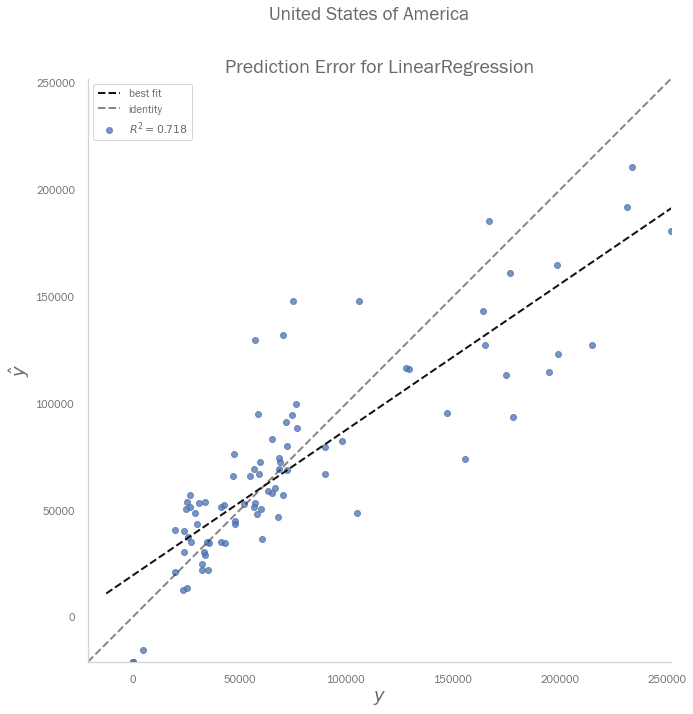

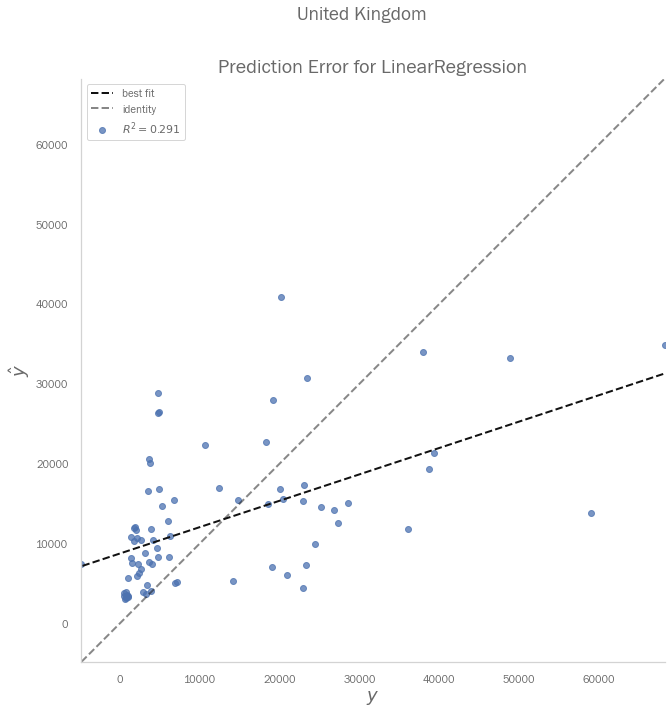

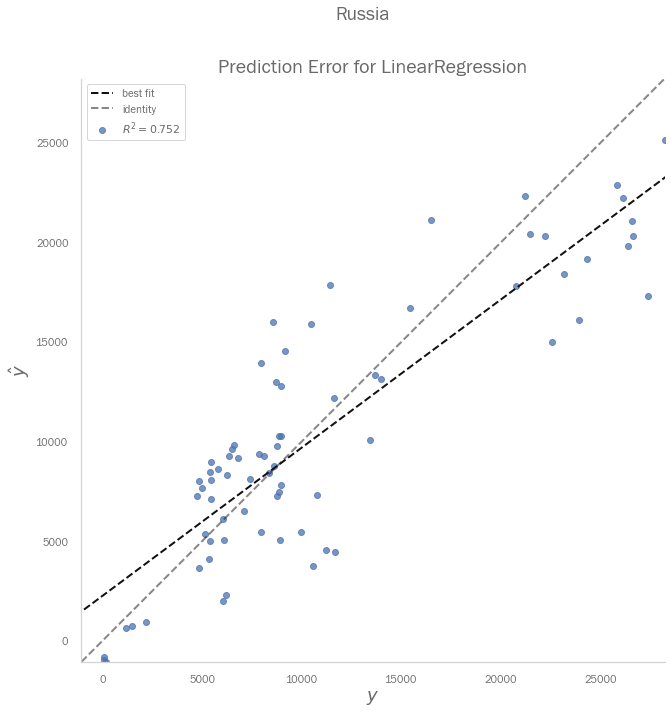

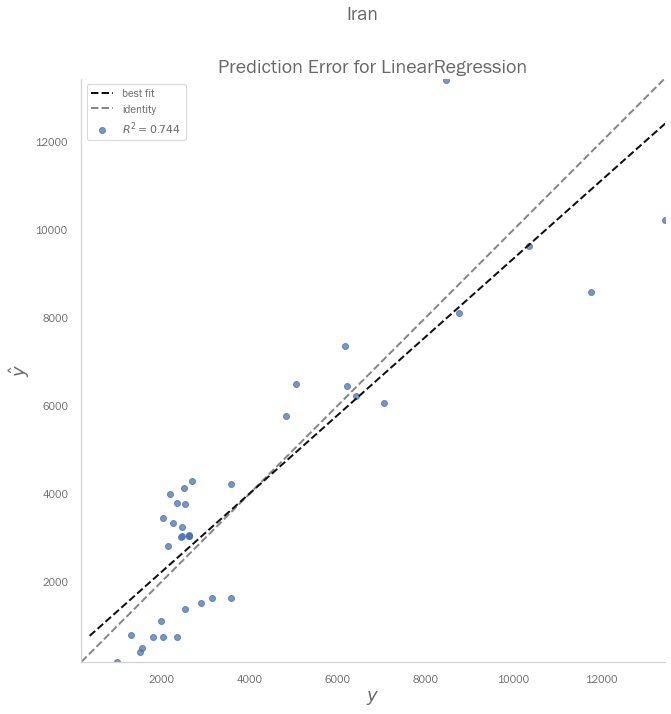

In [78]:

f = plt.figure(figsize =(10,10))
f.suptitle("India")
viz_india_lreg = prediction_error(india_lreg, train_india_x, train_india_y, test_india_x, test_india_y, )


f1 = plt.figure(figsize =(10,10))
f1.suptitle("United States of America")
viz_usa_lreg = prediction_error(usa_lreg, train_usa_x, train_usa_y, test_usa_x, test_usa_y)

f2 = plt.figure(figsize =(10,10))
f2.suptitle("United Kingdom")
viz_uk_lreg = prediction_error(uk_lreg, train_uk_x, train_uk_y, test_uk_x, test_uk_y)

f3 = plt.figure(figsize =(10,10))
f3.suptitle("Russia")
viz_russia_lreg = prediction_error(russia_lreg, train_russia_x, train_russia_y, test_russia_x, test_russia_y)

f4 = plt.figure(figsize =(10,10))
f4.suptitle("Iran")
viz_iran_lreg = prediction_error(iran_lreg, train_iran_x, train_iran_y, test_iran_x, test_iran_y) 



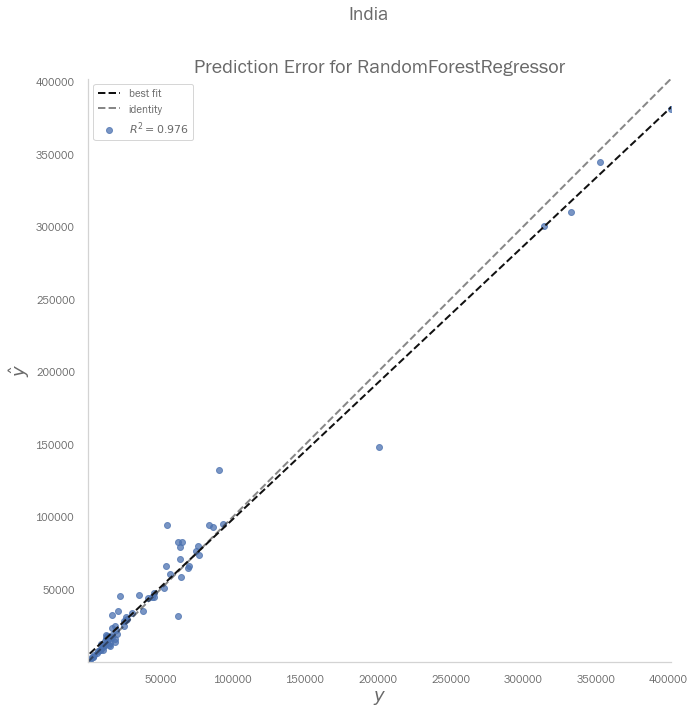

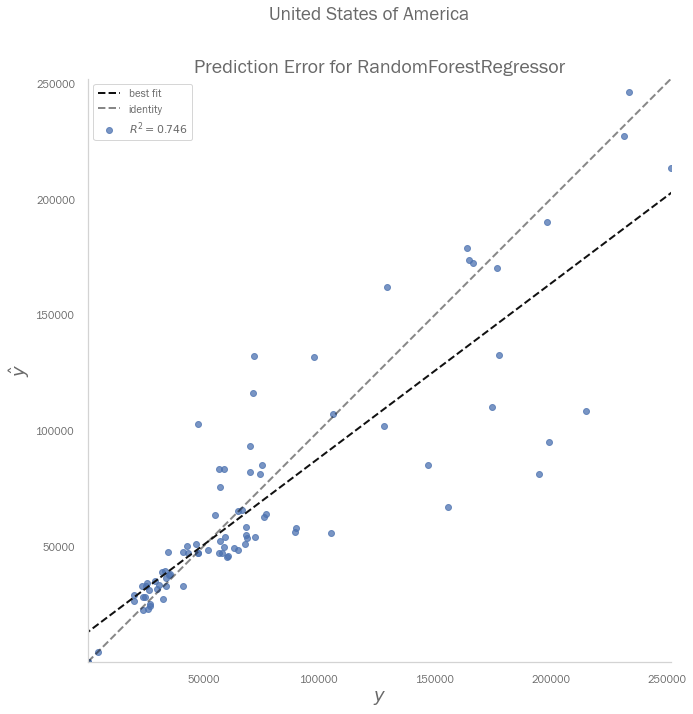

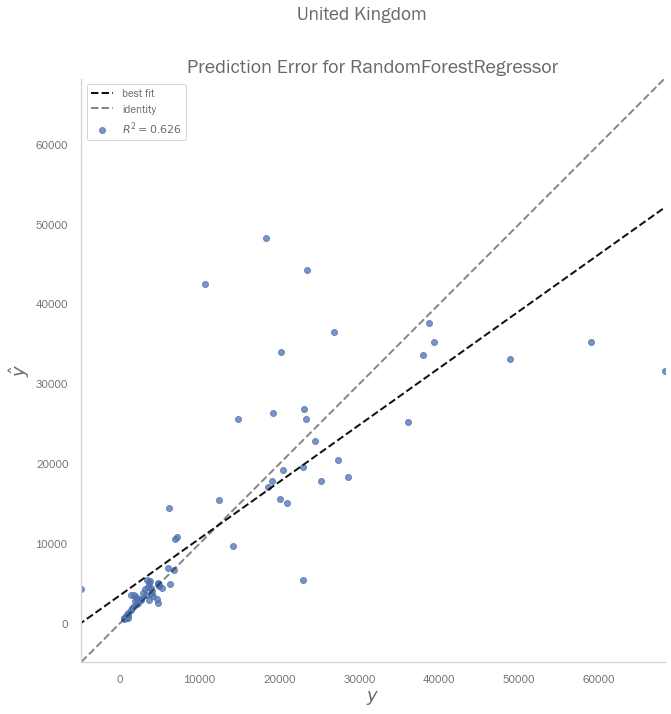

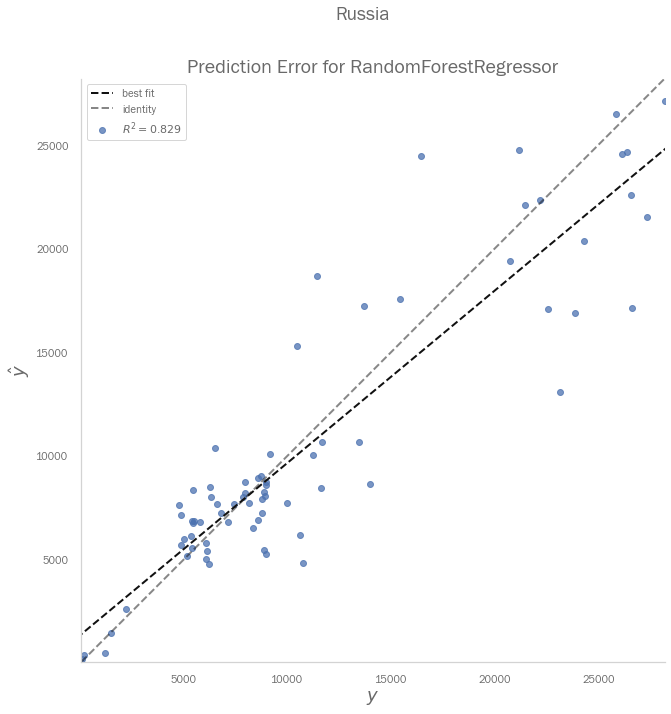

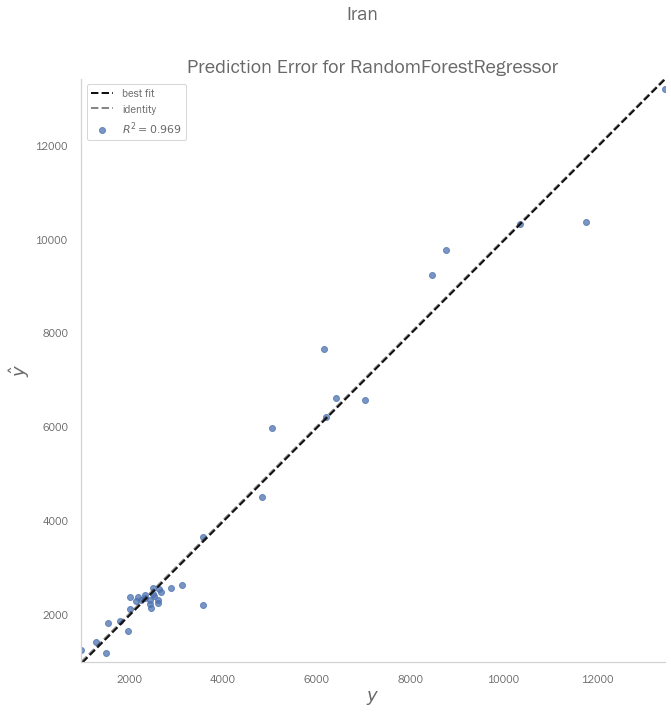

In [79]:

f_forest = plt.figure(figsize =(10,10))
f_forest.suptitle("India")
viz_india_rfr = prediction_error(india_rfr, train_india_x, train_india_y, test_india_x, test_india_y)

f1_forest = plt.figure(figsize=(10,10))
f1_forest.suptitle("United States of America")
viz_usa_rfr = prediction_error(usa_rfr, train_usa_x, train_usa_y, test_usa_x, test_usa_y)

f2_forest = plt.figure(figsize=(10,10))
f2_forest.suptitle("United Kingdom")
viz_uk_rfr = prediction_error(uk_rfr, train_uk_x, train_uk_y, test_uk_x, test_uk_y)

f3_forest = plt.figure(figsize = (10,10))
f3_forest.suptitle("Russia")
viz_russia_rfr = prediction_error(russia_rfr, train_russia_x, train_russia_y, test_russia_x, test_russia_y)

f4_forest = plt.figure(figsize = (10,10))
f4_forest.suptitle("Iran")
viz_iran_rfr = prediction_error(iran_rfr, train_iran_x, train_iran_y, test_iran_x, test_iran_y)

Comparing RMSE of Each Model of the 2 algorithms.

Text(0.5, 1.0, 'RMSE Scores for Linear Regression and Random Forest Regressor Models')

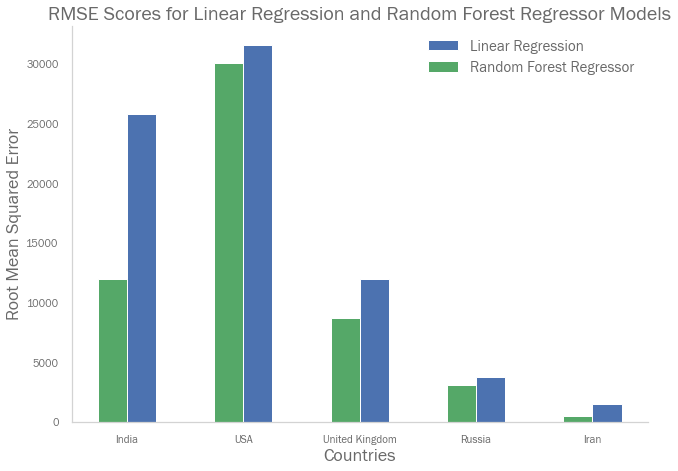

In [80]:
#ADD YTICK
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries , rmse_for_lreg, color = 'b', width = 0.25, align='edge' )

ax.bar(countries , rmse_for_rfr, color = 'g', width = -0.25, align='edge')
plt.legend(['Linear Regression','Random Forest Regressor'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Linear Regression and Random Forest Regressor Models")


From the 2 algorithms, we see that Random Forest performs better because it has a lower RMSE for all selected countries.

# Part 2: Forecasting using ARIMA

Taking Countries Location Data

In [33]:
csv_data = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
dataframe = pd.read_csv(csv_data, usecols= ["location", "date", "new_cases"])
dataframe['date'] = pd.to_datetime(dataframe.date)
dataframe.dropna(inplace=True)
dataframe.tail()


,location,date,new_cases
86192,Zimbabwe,2021-05-01,3.0
86193,Zimbabwe,2021-05-02,21.0
86194,Zimbabwe,2021-05-03,12.0
86195,Zimbabwe,2021-05-04,34.0
86196,Zimbabwe,2021-05-05,30.0


Extracting Data of selected countries

In [34]:
data_ind_arima = dataframe[dataframe['location'] == 'India']
data_usa_arima = dataframe[dataframe['location'] == 'United States']
data_uk_arima = dataframe[dataframe['location'] == 'United Kingdom']
data_russia_arima = dataframe[dataframe['location'] == 'Russia']
data_iran_arima = dataframe[dataframe['location'] == 'Iran']

Now we'll be getting the p,d,q values for each countries ARIMA Model, using auto_arima from pmdarima.

1. p,d,q for India - (5,2,5)
2. p,d,q for USA - (5,1,4)
3. p,d,q for UK -  (5,2,3)
4. p,d,q for Russia - (5,2,5)
5. p,d,q for Iran - (5,2,5)

In [35]:
india_param = (5,2,5)
usa_param = (5,1,4)
uk_param = (5,2,3)
russia_param = (5,2,5)
iran_param = (5,2,5)

In [36]:
def evaluateModel(data, param):
    X = data['new_cases'].values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=param)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

Not to display on site just for internal testing.

In [37]:
india_arima_rmse = evaluateModel(data_ind_arima, india_param) 
print(india_arima_rmse)

predicted=35683.658013, expected=38772.000000
predicted=34612.424179, expected=31118.000000
predicted=38110.686162, expected=36604.000000
predicted=40793.833824, expected=35551.000000
predicted=35747.132158, expected=36595.000000
predicted=34842.596959, expected=36652.000000
predicted=36605.846120, expected=36011.000000
predicted=30571.359662, expected=32981.000000
predicted=28142.913335, expected=26567.000000
predicted=31259.790091, expected=32080.000000
predicted=34590.673500, expected=31521.000000
predicted=31632.368005, expected=29373.000000
predicted=29801.575572, expected=30031.000000
predicted=30211.654150, expected=30254.000000
predicted=24798.559604, expected=27071.000000
predicted=22388.859156, expected=22065.000000
predicted=25772.766828, expected=26382.000000
predicted=27906.652523, expected=24010.000000
predicted=23744.729017, expected=22890.000000
predicted=23190.777105, expected=25152.000000
predicted=25195.522093, expected=26624.000000
predicted=21017.107015, expected=2

In [38]:
usa_arima_rmse = evaluateModel(data_usa_arima, usa_param)
print(usa_arima_rmse)

C:\Users\Abc\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
predicted=160376.475639, expected=208188.000000
predicted=144047.374537, expected=155533.000000
predicted=179360.792435, expected=140234.000000
predicted=126351.847630, expected=160570.000000
predicted=181154.293079, expected=188219.000000
predicted=163763.995303, expected=202557.000000
predicted=174433.184134, expected=223613.000000
predicted=227116.746637, expected=232785.000000
C:\Users\Abc\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
predicted=226293.270564, expected=215542.000000
predicted=191746.510473, expe

In [39]:
uk_arima_rmse = evaluateModel(data_uk_arima, uk_param)
print(uk_arima_rmse)

C:\Users\Abc\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
predicted=12453.926299, expected=12428.000000
predicted=11732.665462, expected=13497.000000
predicted=12596.503326, expected=16237.000000
predicted=16022.022779, expected=14951.000000
predicted=14208.427456, expected=16382.000000
predicted=15965.280235, expected=15579.000000
predicted=16115.253277, expected=17372.000000
predicted=16357.751220, expected=14774.000000
predicted=15927.437395, expected=12386.000000
predicted=13026.342043, expected=16634.000000
predicted=15910.590967, expected=21066.000000
predicted=19656.401898, expected=21784.000000
predicted=19742.307586, expected=21554.000000
predicted=19983.324354, expected=18541.000000
predicted=19486.372468, expected=20377.000000
predicted=21209.980748, expected=18569.000000
pre

In [40]:
russia_arima_rmse = evaluateModel(data_russia_arima, russia_param)
print(russia_arima_rmse)

predicted=26844.489525, expected=26046.000000
predicted=25858.975163, expected=26126.000000
predicted=26031.036263, expected=25043.000000
predicted=26434.717999, expected=27829.000000
predicted=28802.727839, expected=27078.000000
predicted=27313.860595, expected=28450.000000
predicted=27783.118261, expected=28701.000000
predicted=28196.010021, expected=27798.000000
predicted=27607.038042, expected=25752.000000
predicted=26954.456142, expected=25838.000000
predicted=26978.359464, expected=27562.000000
predicted=28306.384002, expected=28206.000000
predicted=28595.625003, expected=27729.000000
predicted=28012.244000, expected=27651.000000
predicted=26896.682293, expected=26902.000000
predicted=25801.506955, expected=26265.000000
predicted=26240.472804, expected=26074.000000
predicted=27143.501517, expected=27787.000000
predicted=28370.984623, expected=28116.000000
predicted=28226.276190, expected=27772.000000
predicted=27750.068429, expected=28510.000000
predicted=27573.035089, expected=2

In [41]:
iran_arima_rmse = evaluateModel(data_iran_arima, iran_param)
print(iran_arima_rmse)

predicted=12046.968147, expected=11561.000000
predicted=11512.928719, expected=10827.000000
C:\Users\Abc\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
predicted=11051.234816, expected=11023.000000
predicted=10958.961962, expected=10223.000000
predicted=10270.323156, expected=10403.000000
predicted=9896.686653, expected=9384.000000
predicted=9104.880375, expected=8411.000000
predicted=7759.462585, expected=7451.000000
predicted=7029.159616, expected=7501.000000
predicted=7163.766262, expected=7704.000000
predicted=7633.517502, expected=7603.000000
predicted=7518.914421, expected=7453.000000
predicted=6834.154128, expected=7121.000000
predicted=6513.976724, expected=6421.000000
predicted=5686.400868, expected=6312.000000
predicted=6076.283293, expected=6151.000000
predicte

Now comparing the RMSE of ARIMA and Other Models

In [42]:
rmse_for_arima = list()
rmse_for_arima.extend([india_arima_rmse, usa_arima_rmse, uk_arima_rmse, russia_arima_rmse, iran_arima_rmse])

Text(0.5, 1.0, 'RMSE Scores for Linear Regression and Random Forest Regressor Models')

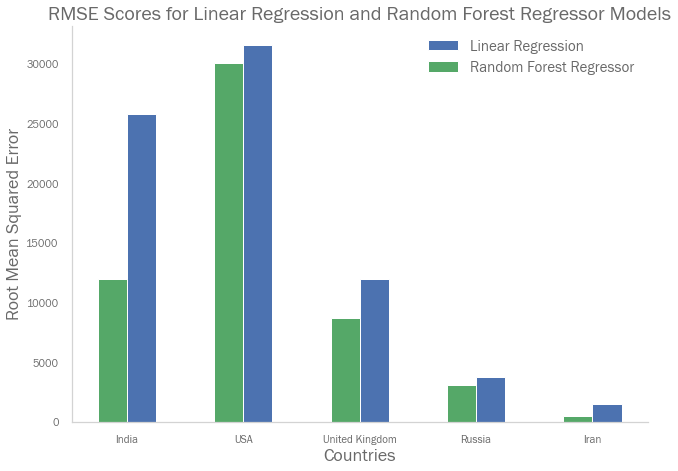

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries , rmse_for_lreg, color = 'b', width = 0.25, align='edge' )

ax.bar(countries , rmse_for_rfr, color = 'g', width = -0.25, align='edge')
plt.legend(['Linear Regression','Random Forest Regressor'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Linear Regression and Random Forest Regressor Models")

Text(0.5, 1.0, 'RMSE Scores for Random Forest Regressor and ARIMA Models')

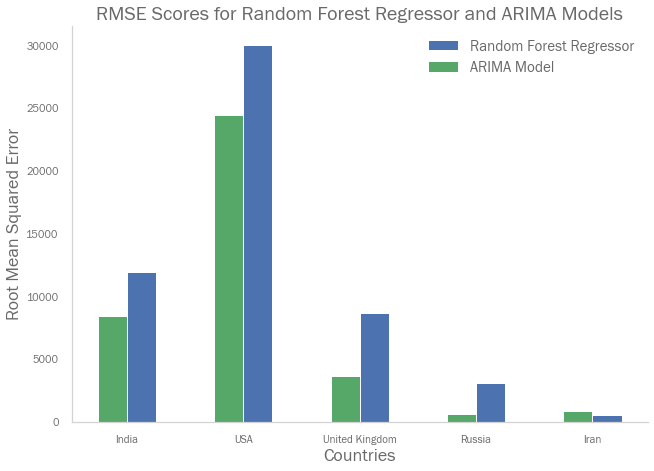

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries , rmse_for_rfr, color = 'b', width = 0.25, align='edge' )

ax.bar(countries , rmse_for_arima, color = 'g', width = -0.25, align='edge')
plt.legend(['Random Forest Regressor', 'ARIMA Model'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Random Forest Regressor and ARIMA Models")

As you can see, ARIMA provides lowest RMSE value compared to RFR. So we will use ARIMA to forecast 7 days ahead for these countries.

Creating actual models for forecasting.

In [45]:
india_arima = ARIMA(data_ind_arima['new_cases'], order = (5,2,5))
india_arima_fit = india_arima.fit()

In [46]:
usa_arima = ARIMA(data_usa_arima['new_cases'], order = (5,1,4))
usa_arima_fit = usa_arima.fit()

In [47]:
uk_arima = ARIMA(data_uk_arima['new_cases'], order = (5,2,3))
uk_arima_fit = uk_arima.fit()

C:\Users\Abc\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [48]:
russia_arima = ARIMA(data_russia_arima['new_cases'], order = (5,2,5))
russia_arima_fit = russia_arima.fit()

In [49]:
iran_arima = ARIMA(data_iran_arima['new_cases'], order = (5,2,5))
iran_arima_fit = iran_arima.fit()

Calculating rmse for each country ARIMA

In [89]:
india_forecasts = india_arima_fit.forecast(steps = 7)

usa_forecasts = usa_arima_fit.forecast(steps = 7)
uk_forecasts = uk_arima_fit.forecast(steps = 7)
russia_forecasts = russia_arima_fit.forecast(steps = 7)
iran_forecasts = iran_arima_fit.forecast(steps = 7)

Creating a dataframe with the dates and forecasts.

In [58]:
dates = list()
for i in range(7):
    date = date.today()
    increment = timedelta(days = i)
    date = date + increment
    dates.append(date)
    
    
print(dates)


[datetime.date(2021, 5, 6), datetime.date(2021, 5, 7), datetime.date(2021, 5, 8), datetime.date(2021, 5, 9), datetime.date(2021, 5, 10), datetime.date(2021, 5, 11), datetime.date(2021, 5, 12)]


             India           USA           UK       Russia          Iran
442            NaN           NaN          NaN          NaN  14559.271311
443            NaN           NaN          NaN          NaN  12731.178079
444            NaN           NaN          NaN          NaN  11665.402134
445            NaN           NaN          NaN          NaN  12876.562348
446            NaN           NaN          NaN          NaN  14616.543760
447            NaN           NaN          NaN          NaN  12876.691512
448            NaN           NaN          NaN          NaN   9577.115016
461            NaN           NaN  2115.296579  8375.775106           NaN
462  414121.741424           NaN  1939.896970  8485.713470           NaN
463  416415.876489           NaN  1706.864111  8347.436504           NaN
464  411106.830391           NaN  1560.401917  8246.884854           NaN
465  392608.604120           NaN  1566.653697  7873.065848           NaN
466  388218.176070           NaN  1679.068871  7456

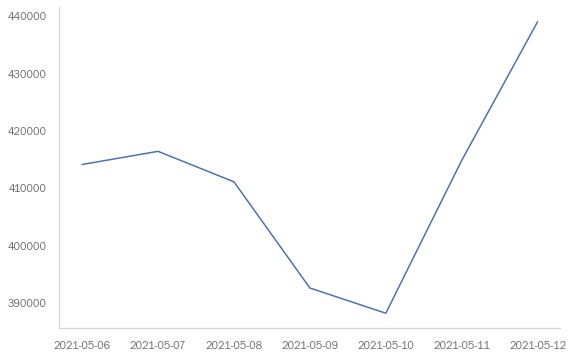

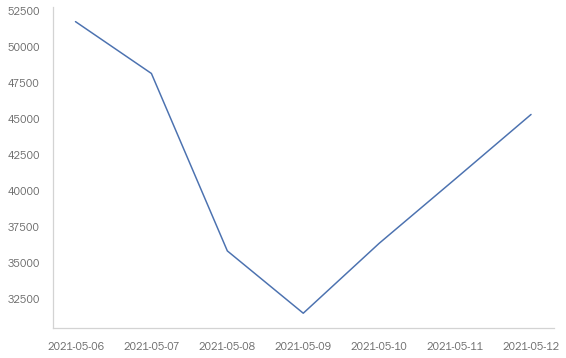

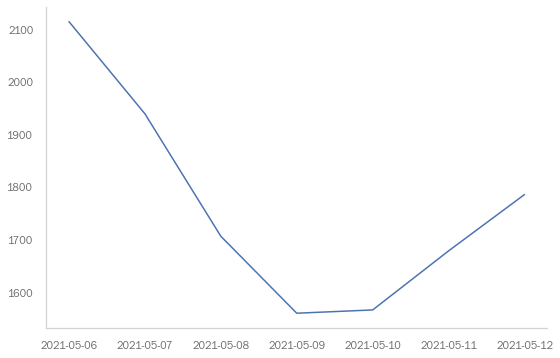

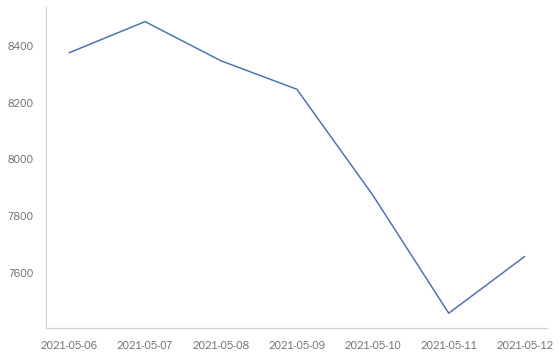

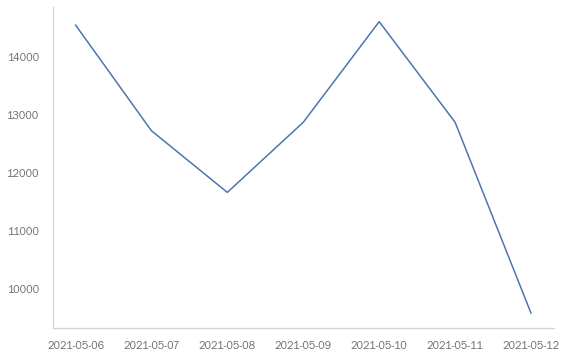

In [83]:
plt.plot(dates, india_forecasts)
plt.show()
plt.plot(dates, usa_forecasts)
plt.show()
plt.plot(dates, uk_forecasts)
plt.show()
plt.plot(dates, russia_forecasts)
plt.show()
plt.plot(dates, iran_forecasts)
plt.show()